<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initializing" data-toc-modified-id="Initializing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initializing</a></span></li><li><span><a href="#Bayesian-Inference" data-toc-modified-id="Bayesian-Inference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bayesian Inference</a></span><ul class="toc-item"><li><span><a href="#Generating-Data:" data-toc-modified-id="Generating-Data:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generating Data:</a></span></li><li><span><a href="#Prior-P(θ)" data-toc-modified-id="Prior-P(θ)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Prior P(θ)</a></span></li><li><span><a href="#Likelihood-P(X|θ)" data-toc-modified-id="Likelihood-P(X|θ)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Likelihood P(X|θ)</a></span></li><li><span><a href="#Posterior.-P(θ|X)" data-toc-modified-id="Posterior.-P(θ|X)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Posterior. P(θ|X)</a></span></li></ul></li><li><span><a href="#Bühlmann-Credibility" data-toc-modified-id="Bühlmann-Credibility-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bühlmann Credibility</a></span><ul class="toc-item"><li><span><a href="#Credibility-Derivation" data-toc-modified-id="Credibility-Derivation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Credibility Derivation</a></span></li></ul></li></ul></div>

The Bayesian Inference is used in actuarial concepts. 

This workbook is using the work done here: https://towardsdatascience.com/bayesian-inference-intuition-and-example-148fd8fb95d6

A good paper describing how credibilty is used with actuarial is located here: https://www.soa.org/globalassets/assets/files/resources/tables-calcs-tools/credibility-methods-life-health-pensions.pdf

An open source book (Loss Data Analytics) showing credibility is used has a good example of the beta-binomial model and derivation of credibility - specifically example 9.5.1

https://ewfrees.github.io/Loss-Data-Analytics/C-Credibility.html#S:Cred:BayesInf

**Example:**

Let's say we have the following assumptions
  - exposures:
  - rate:
  - vbt_exposures:
  - vbt_rate:

We want to calculate the rate we expect given this information

## Initializing

In [166]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.set_printoptions(threshold=100)

## Bayesian Inference

Let’s generate the data X. In real life, you don’t have any control over X. This is what you are going to observe.

### Generating Data:

In [245]:
exposures = 10000
rate = .02
vbt_exposures = 10000
vbt_rate = .1

In [246]:
mortality_data = np.random.binomial(n=1, p=rate, size=exposures)

In [247]:
len(mortality_data)

10000

Bayesian Inference has three steps.

**Step 1** [Prior] Choose a PDF to model your parameter θ, aka the prior distribution P(θ). This is your best guess about parameters before seeing the data X.

**Step 2** [Likelihood] Choose a PDF for P(X|θ). Basically you are modeling how the data X will look like given the parameter θ.

**Step 3** [Posterior] Calculate the posterior distribution P(θ|X) and pick the θ that has the highest P(θ|X).

And the posterior becomes the new prior. Repeat step 3 as you get more data.

### Prior P(θ)

The first step is to choose the PDF to model the parameter θ.

What does the parameter θ represent?

The mortality rate.

Then, what kind of probability distributions should we use to model a probability?

To represent a probability, there are a few conditions to meet. First, the domain should be ranged from 0 to 1. Second, it should be a continuous distribution.

Then there are two well-known probability distributions that I can think of:

Beta and Dirichlet.

Dirichlet is for multivariate and Beta is for univariate. We have only one thing to predict, which is a probability, so let’s use the Beta distribution.

(An interesting side note: It’s easy to create an arbitrary distribution over (0,1). Just take any function that doesn’t blow up anywhere between 0 and 1 and stays positive. Then, simply integrate it from 0 to 1 and divide the function with that result.)

To use a Beta distribution, there are two parameters, α & β, that we need to decide. You can think of α as How many people die and β as how many people don’tdie. These parameters — how big or small α & β are — will determine the shape of the distribution.

In [267]:
a = vbt_rate * vbt_exposures
b = vbt_exposures - a
# domain θ
theta_range = np.linspace(0, 1, vbt_exposures)
# prior distribution P(θ)
prior = stats.beta.pdf(x = theta_range, a=a, b=b)

Let’s plot the prior distribution with respect to all θ values.

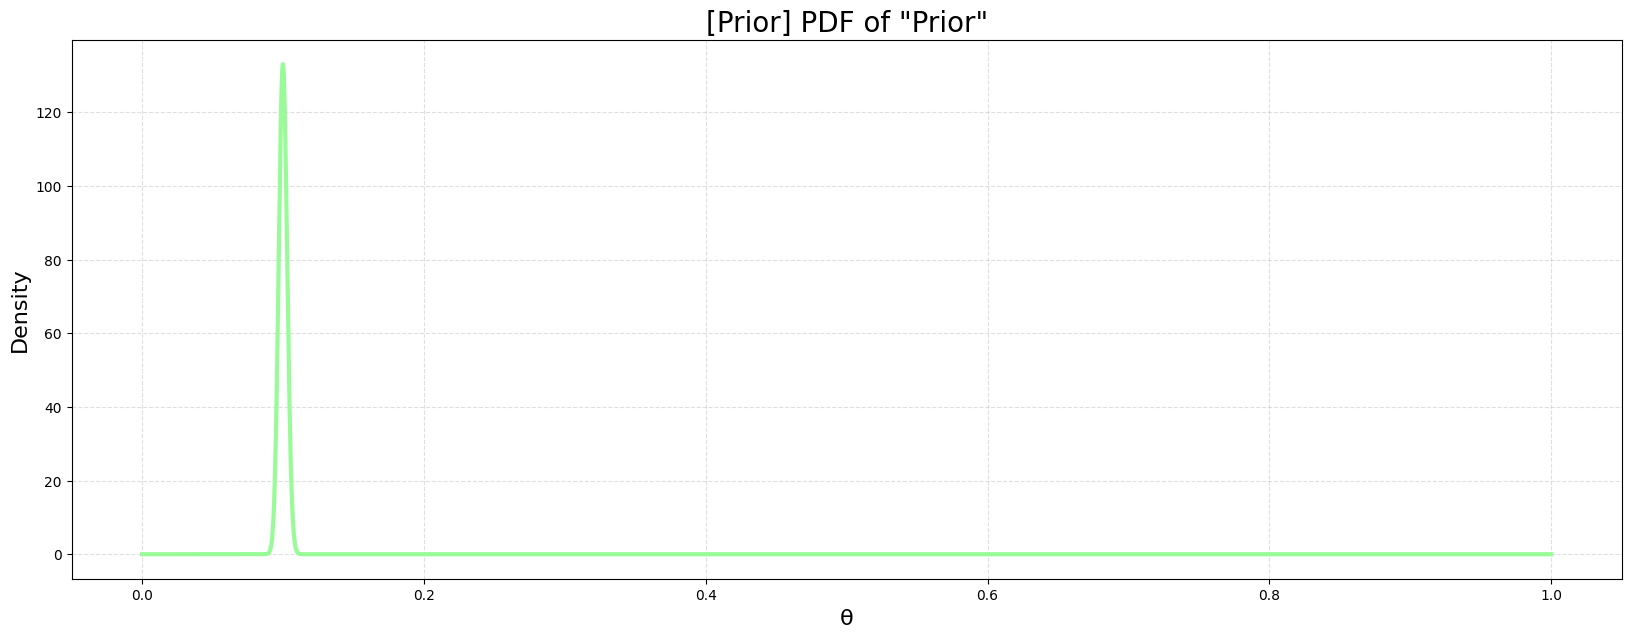

In [268]:
# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='palegreen')
# Add a title
plt.title('[Prior] PDF of "Prior"', fontsize=20)
# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()

### Likelihood P(X|θ)

Choose a probability model for P(X|θ), the probability of seeing the data X given a particular parameter θ. Likelihood is also called a sampling distribution. To me, the term “sampling distribution” is much more intuitive than “likelihood”.

**Binomial distribution with n & p.**

In [269]:
# The sampling dist P(X|θ) with a prior θ
likelihood = stats.binom.pmf(k = np.sum(mortality_data), n = len(mortality_data), p = a/(a+b))

Is our prior assumption θ highly likely?

In [270]:
likelihood

3.606572768158417e-205

In [271]:
likelihood

3.606572768158417e-205

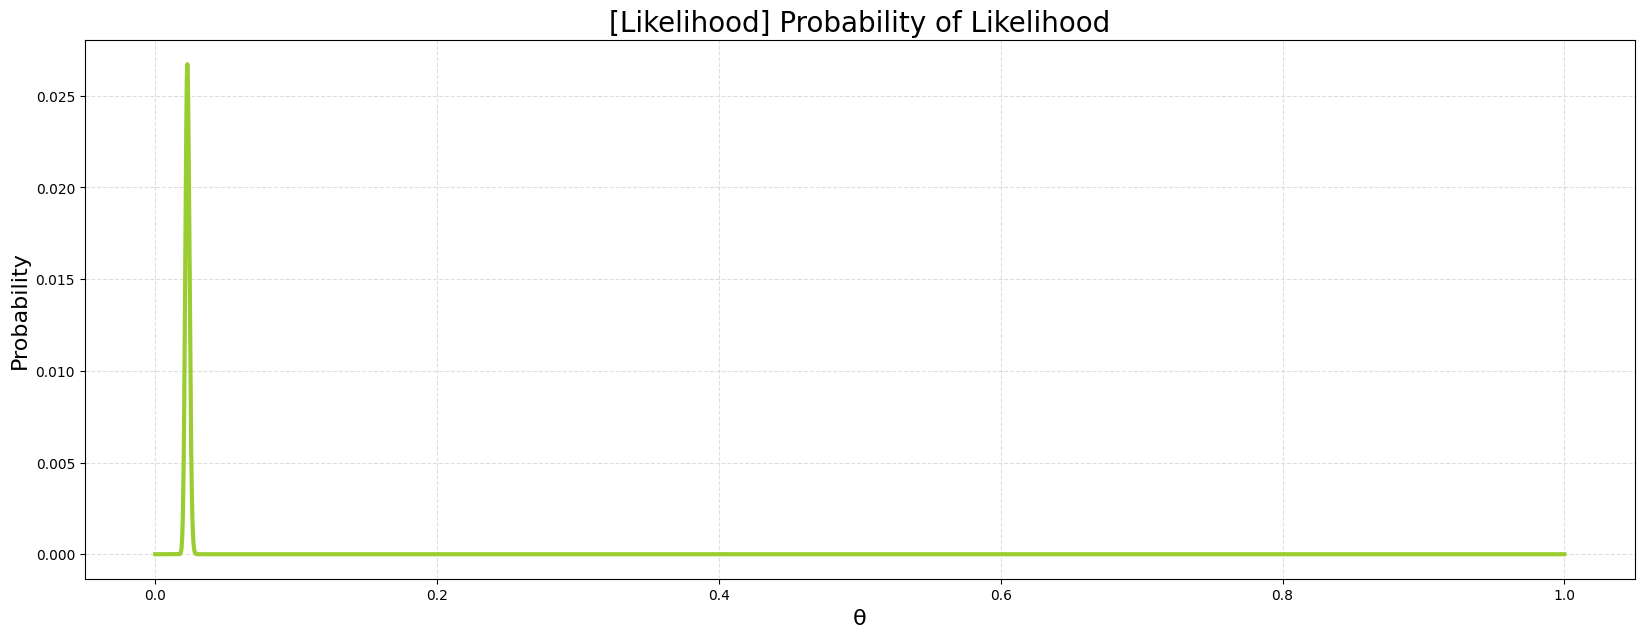

In [272]:
# Likelihood P(X|θ) for all θ's
likelihood = stats.binom.pmf(k = np.sum(mortality_data), n = len(mortality_data), p = theta_range)
# Create the plot
fig, ax = plt.subplots()
plt.plot(theta_range, likelihood, linewidth=3, color='yellowgreen')
# Add a title
plt.title('[Likelihood] Probability of Likelihood' , fontsize=20)
# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Probability', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()

### Posterior. P(θ|X)

Finally, let’s answer the question we asked in the beginning:

>Specifically, we will have a large number of data points X. How do we multiply the probability wrt X with the probability wrt θ?

Even though there are thousands of data points, we can convert them into a single scalar — the likelihood P(X|θ) — by plugging data into the model that you chose (in this example, the binomial distribution.)

Then, we calculate P(θ) & P(X|θ) for a specific θ and multiply them together. If you do this for every possible θ, you can pick the highest P(θ) * P(X|θ) among different θ’s.

Your initial guess about parameters was P(θ). Now you are upgrading a simple P(θ) into something more informative — P(θ|X) — as more data become available.

P(θ|X) is still the probability of θ, just like P(θ) is. However, P(θ|X) is a smarter version of P(θ).

In [273]:
prior = stats.beta.pdf(x = theta_range, a=a, b=b)
likelihood = stats.binom.pmf(k = np.sum(mortality_data), n = len(mortality_data), p = theta_range) 
posterior = likelihood * prior
normalized_posterior = posterior / np.sum(posterior)

In [274]:
np.argmax(prior)/vbt_exposures

0.0999

In [275]:
np.argmax(likelihood)/vbt_exposures

0.0228

In [276]:
np.argmax(posterior)/vbt_exposures

0.0614

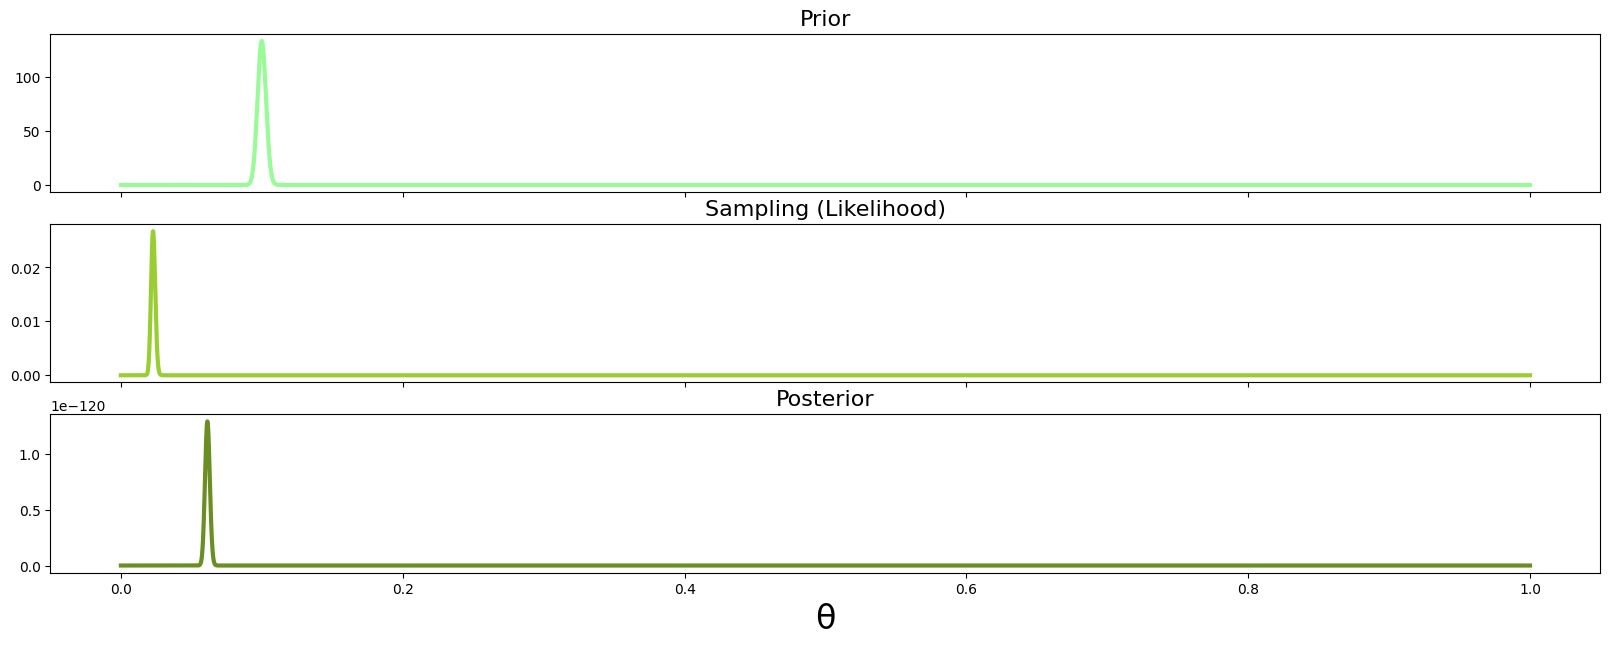

In [277]:
# Plotting all three together
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)
axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()

### Other method

In [262]:
prior_a = vbt_rate * vbt_exposures
prior_b = vbt_exposures - a

post_a = prior_a + rate * exposures
post_b = prior_b + exposures - rate * exposures

In [263]:
post_rate = post_a / (post_a + post_b)
post_rate

0.06

In [264]:
prior_rate = prior_a / (prior_a + prior_b)
prior_rate

0.1

## Bühlmann Credibility

As stated in `credibility methods life health pensions`

Bühlmann credibility, Least Squares credibility, and Linear Bayesian credibility. These aliases resulted from
Bühlmann’s development of a credibility method that was the least squares linear approximation to Bayesian credibility

The credibility weight, `𝑍`, was calculated to minimize the expected value of the square of the differences between the Bühlmann-weighted estimate and the Bayesian predictive mean.

$Z = \frac{n}{n+k}$

$k = \frac{EPV}{VHM}$

$EPV = Expected Process Variance$

$VHM = Variance of Hypothetical Mean$

For a binomial-beta distribution

$k = a + b$

In [265]:
prior_x = a
prior_n = a+b
prior = prior_x/prior_n
likelihood_x = sum(mortality_data)
likelihood_n = len(mortality_data)
likelihood = likelihood_x/likelihood_n
k = a + b
z = likelihood_n/(likelihood_n + a + b)

print(" a: {}\n b: {}\n prior: {}\n likelihood: {}\n likelihood_n: {}\n k: {}\n z: {}".format(a, b, prior, likelihood, likelihood_n, k, z))

 a: 1000.0
 b: 9000.0
 prior: 0.1
 likelihood: 0.0228
 likelihood_n: 10000
 k: 10000.0
 z: 0.5


In [266]:
posterior =  z * (likelihood) + (1 - z) * (prior)
print(" posterior: {}".format(posterior))

 posterior: 0.0614
